In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


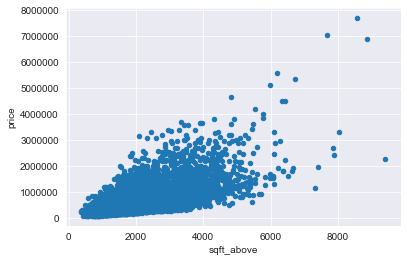

In [28]:
df.plot(kind = 'scatter', x = 'sqft_above', y='price')

In [41]:
df.price.mean()

540057.663833937

In [2]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [3]:
df.dropna(axis=0, subset=['view'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       19164 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     17704 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


In [61]:
df.waterfront.value_counts(normalize = True)

0.0    0.992152
1.0    0.007848
Name: waterfront, dtype: float64

In [4]:
df['waterfront'].fillna("?", inplace=True)

wf_prob = [0.992434, .007566]
prob = [i/sum(wf_prob) for i in wf_prob]

def impute_waterfront(value):
    if value == "?":
        return np.random.choice([0.0, 1.0], p=prob)
    else:
        return value
    
df.waterfront = df.waterfront.map(lambda x: impute_waterfront(x))

In [5]:
df.drop(labels=['yr_renovated'], axis=1, inplace=True)

In [6]:
new_basement = df[df['sqft_basement'] != '?']
new_basement.sqft_basement.astype('float').describe()

count    21082.000000
mean       291.359975
std        442.007858
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [7]:
basement_mean = new_basement.sqft_basement.astype('float').mean()

def impute_basement(value):
    if value == "?":
        return basement_mean
    else:
        return value
    
df.sqft_basement = df.sqft_basement.map(lambda x: impute_basement(x)).astype('float')

display(df.info())
df['sqft_basement'].value_counts(normalize=True).head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null float64
yr_built         21534 non-null int64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(11), object(1)
memory usage: 3.5+ MB


None

0.000000      0.594316
291.359975    0.020990
600.000000    0.010031
500.000000    0.009706
700.000000    0.009613
Name: sqft_basement, dtype: float64

In [8]:
import datetime as dt

df['date'] = pd.to_datetime(df['date'])
df['day_of_year'] = df['date'].dt.dayofyear
df['month'] = df['date'].dt.month

display(df.day_of_year.values,df.month.values)

array([286, 343,  56, ..., 174,  16, 288])

array([10, 12,  2, ...,  6,  1, 10])

In [9]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year,month
id,1.000000,-0.017392,0.000991,0.004971,-0.012381,-0.132061,0.018573,-0.008429,0.011592,-0.023944,...,-0.010967,-0.004432,0.021609,-0.008027,-0.002001,0.020637,-0.002707,-0.138607,-0.012328,-0.012432
price,-0.017392,1.000000,0.308063,0.525053,0.701587,0.090338,0.257052,0.241756,0.395734,0.035393,...,0.605695,0.320197,0.054273,-0.053620,0.307868,0.022417,0.585304,0.083189,-0.011269,-0.009691
bedrooms,0.000991,0.308063,1.000000,0.514368,0.577934,0.032735,0.177391,-0.005137,0.078523,0.026402,...,0.479148,0.298345,0.155462,-0.153990,-0.010415,0.132318,0.392874,0.030952,-0.001617,-0.000876
bathrooms,0.004971,0.525053,0.514368,1.000000,0.755277,0.088921,0.502285,0.059019,0.186451,-0.126682,...,0.686173,0.278673,0.507565,-0.204435,0.024487,0.225025,0.569139,0.088854,0.006596,0.007133
sqft_living,-0.012381,0.701587,0.577934,0.755277,1.000000,0.173768,0.353529,0.095196,0.282532,-0.059783,...,0.876553,0.428988,0.318217,-0.199839,0.052383,0.241856,0.756208,0.184801,0.011207,0.011968
sqft_lot,-0.132061,0.090338,0.032735,0.088921,0.173768,1.000000,-0.005025,0.017936,0.075298,-0.008375,...,0.184325,0.015370,0.052646,-0.129846,-0.085143,0.230137,0.145142,0.717095,-0.003434,-0.003504
floors,0.018573,0.257052,0.177391,0.502285,0.353529,-0.005025,1.000000,0.019004,0.028436,-0.264138,...,0.523367,-0.242840,0.489410,-0.058966,0.049419,0.125329,0.279176,-0.010850,0.013170,0.013782
waterfront,-0.008429,0.241756,-0.005137,0.059019,0.095196,0.017936,0.019004,1.000000,0.352928,0.015980,...,0.065311,0.076499,-0.021523,0.026254,-0.011464,-0.034810,0.079211,0.026602,0.006629,0.005532
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.352928,1.000000,0.045735,...,0.166299,0.273382,-0.054564,0.085277,0.006141,-0.077894,0.279561,0.073332,-0.004329,-0.005327
condition,-0.023944,0.035393,0.026402,-0.126682,-0.059783,-0.008375,-0.264138,0.015980,0.045735,1.000000,...,-0.158830,0.168548,-0.361398,0.002125,-0.015594,-0.105475,-0.093172,-0.002702,0.021922,0.022347


In [10]:
pd.set_option('display.max_columns', 500)
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year,month
id,1.000000,-0.017392,0.000991,0.004971,-0.012381,-0.132061,0.018573,-0.008429,0.011592,-0.023944,0.008331,-0.010967,-0.004432,0.021609,-0.008027,-0.002001,0.020637,-0.002707,-0.138607,-0.012328,-0.012432
price,-0.017392,1.000000,0.308063,0.525053,0.701587,0.090338,0.257052,0.241756,0.395734,0.035393,0.668307,0.605695,0.320197,0.054273,-0.053620,0.307868,0.022417,0.585304,0.083189,-0.011269,-0.009691
bedrooms,0.000991,0.308063,1.000000,0.514368,0.577934,0.032735,0.177391,-0.005137,0.078523,0.026402,0.356095,0.479148,0.298345,0.155462,-0.153990,-0.010415,0.132318,0.392874,0.030952,-0.001617,-0.000876
bathrooms,0.004971,0.525053,0.514368,1.000000,0.755277,0.088921,0.502285,0.059019,0.186451,-0.126682,0.665312,0.686173,0.278673,0.507565,-0.204435,0.024487,0.225025,0.569139,0.088854,0.006596,0.007133
sqft_living,-0.012381,0.701587,0.577934,0.755277,1.000000,0.173768,0.353529,0.095196,0.282532,-0.059783,0.762398,0.876553,0.428988,0.318217,-0.199839,0.052383,0.241856,0.756208,0.184801,0.011207,0.011968
sqft_lot,-0.132061,0.090338,0.032735,0.088921,0.173768,1.000000,-0.005025,0.017936,0.075298,-0.008375,0.115122,0.184325,0.015370,0.052646,-0.129846,-0.085143,0.230137,0.145142,0.717095,-0.003434,-0.003504
floors,0.018573,0.257052,0.177391,0.502285,0.353529,-0.005025,1.000000,0.019004,0.028436,-0.264138,0.458694,0.523367,-0.242840,0.489410,-0.058966,0.049419,0.125329,0.279176,-0.010850,0.013170,0.013782
waterfront,-0.008429,0.241756,-0.005137,0.059019,0.095196,0.017936,0.019004,1.000000,0.352928,0.015980,0.078044,0.065311,0.076499,-0.021523,0.026254,-0.011464,-0.034810,0.079211,0.026602,0.006629,0.005532
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.352928,1.000000,0.045735,0.249727,0.166299,0.273382,-0.054564,0.085277,0.006141,-0.077894,0.279561,0.073332,-0.004329,-0.005327
condition,-0.023944,0.035393,0.026402,-0.126682,-0.059783,-0.008375,-0.264138,0.015980,0.045735,1.000000,-0.147326,-0.158830,0.168548,-0.361398,0.002125,-0.015594,-0.105475,-0.093172,-0.002702,0.021922,0.022347


In [11]:
abs(df.corr())>.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year,month
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


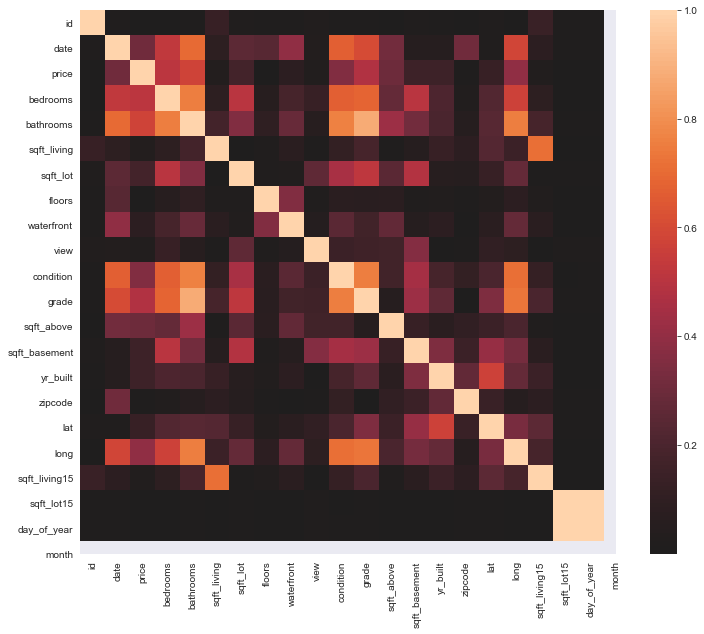

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(abs(df.corr()), center=.0, xticklabels=df.columns.values, yticklabels=df.columns.values);

In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

outcome = 'price'
x_cols = df.drop(['price','date','zipcode','id'], axis=1).columns
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors

model = smf.ols(formula=f, data=df).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                     OLS                    Adj. R-squared:           0.693      
Dependent Variable:        price                  AIC:                      587414.8393
Date:                      2020-07-15 10:44       BIC:                      587566.4096
No. Observations:          21534                  Log-Likelihood:           -2.9369e+05
Df Model:                  18                     F-statistic:              2703.      
Df Residuals:              21515                  Prob (F-statistic):       0.00       
R-squared:                 0.693                  Scale:                    4.1118e+10 
---------------------------------------------------------------------------------------
                  Coef.        Std.Err.      t     P>|t|      [0.025         0.975]    
---------------------------------------------------------------------------------------
Intercept     -36345949.4919 1593816.8755 -22.8043 0.0000 -39469948.9119 -33221950.0719
bedrooms         -34894.8644    1914.4231 -18.2274 0.0000    -38647.2758    -31142.4529
bathrooms         44409.7301    3267.8125  13.5900 0.0000     38004.5750     50814.8851
sqft_living          82.3761      21.4004   3.8493 0.0001        40.4297       124.3225
sqft_lot              0.1174       0.0483   2.4306 0.0151         0.0227         0.2121
floors             2467.9067    3613.2485   0.6830 0.4946     -4614.3286      9550.1420
waterfront       508781.2172   16772.8988  30.3335 0.0000    475905.0902    541657.3443
view              55762.2518    2109.0279  26.4398 0.0000     51628.4006     59896.1030
condition         29420.8805    2325.2545  12.6528 0.0000     24863.2091     33978.5520
grade             98243.6810    2177.1183  45.1256 0.0000     93976.3676    102510.9945
sqft_above           97.8785      21.4114   4.5713 0.0000        55.9106       139.8464
sqft_basement        64.2392      21.3932   3.0028 0.0027        22.3070       106.1714
yr_built          -2596.4460      69.0096 -37.6244 0.0000     -2731.7099     -2461.1820
lat              557254.7096   10562.3942  52.7584 0.0000    536551.6326    577957.7866
long            -116611.5500   12021.0423  -9.7006 0.0000   -140173.6854    -93049.4145
sqft_living15        25.0070       3.4620   7.2232 0.0000        18.2212        31.7929
sqft_lot15           -0.3854       0.0739  -5.2125 0.0000        -0.5303        -0.2405
day_of_year        -457.7062     160.0950  -2.8590 0.0043      -771.5043      -143.9080
month             10959.9349    4869.1395   2.2509 0.0244      1416.0599     20503.8099
---------------------------------------------------------------------------------------
Omnibus:                  18401.566            Durbin-Watson:               1.991      
Prob(Omnibus):            0.000                Jarque-Bera (JB):            1827939.014
Skew:                     3.602                Prob(JB):                    0.000      
Kurtosis:                 47.557               Condition No.:               58275479   
=======================================================================================
* The condition number is large (6e+07). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [18]:
outcome = 'price'
x_cols = df.drop(['price','date','zipcode','floors','id'], axis=1).columns
predictors = '+'.join(x_cols)
f = outcome + '~' + predictors

model = smf.ols(formula=f, data=df).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                     OLS                    Adj. R-squared:           0.693      
Dependent Variable:        price                  AIC:                      587413.3062
Date:                      2020-07-15 10:45       BIC:                      587556.8992
No. Observations:          21534                  Log-Likelihood:           -2.9369e+05
Df Model:                  17                     F-statistic:              2862.      
Df Residuals:              21516                  Prob (F-statistic):       0.00       
R-squared:                 0.693                  Scale:                    4.1117e+10 
---------------------------------------------------------------------------------------
                  Coef.        Std.Err.      t     P>|t|      [0.025         0.975]    
---------------------------------------------------------------------------------------
Intercept     -36534721.8077 1569651.2229 -23.2757 0.0000 -39611354.7461 -33458088.8692
bedrooms         -34933.6414    1913.5574 -18.2559 0.0000    -38684.3560    -31182.9269
bathrooms         45015.5302    3145.1034  14.3129 0.0000     38850.8941     51180.1663
sqft_living          81.3512      21.3475   3.8108 0.0001        39.5085       123.1938
sqft_lot              0.1167       0.0483   2.4158 0.0157         0.0220         0.2114
waterfront       508793.7164   16772.6809  30.3347 0.0000    475918.0165    541669.4162
view              55814.2844    2107.6254  26.4821 0.0000     51683.1821     59945.3867
condition         29297.1712    2318.1609  12.6381 0.0000     24753.4037     33840.9387
grade             98376.0623    2168.4468  45.3671 0.0000     94125.7456    102626.3791
sqft_above           99.3081      21.3085   4.6605 0.0000        57.5418       141.0745
sqft_basement        64.3409      21.3924   3.0077 0.0026        22.4102       106.2716
yr_built          -2586.9557      67.5955 -38.2711 0.0000     -2719.4479     -2454.4635
lat              557998.9846   10505.9037  53.1129 0.0000    537406.6332    578591.3360
long            -117730.2588   11908.7883  -9.8860 0.0000   -141072.3681    -94388.1495
sqft_living15        24.7119       3.4349   7.1943 0.0000        17.9792        31.4446
sqft_lot15           -0.3871       0.0739  -5.2384 0.0000        -0.5319        -0.2423
day_of_year        -458.6145     160.0875  -2.8648 0.0042      -772.3979      -144.8311
month             10992.0471    4868.8522   2.2576 0.0240      1448.7354     20535.3588
---------------------------------------------------------------------------------------
Omnibus:                  18381.739            Durbin-Watson:               1.991      
Prob(Omnibus):            0.000                Jarque-Bera (JB):            1820772.628
Skew:                     3.597                Prob(JB):                    0.000      
Kurtosis:                 47.469               Condition No.:               57392615   
=======================================================================================
* The condition number is large (6e+07). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [19]:
norm_candidates = ['sqft_living', 'sqft_lot', 'sqft_above','sqft_living15','sqft_lot15']

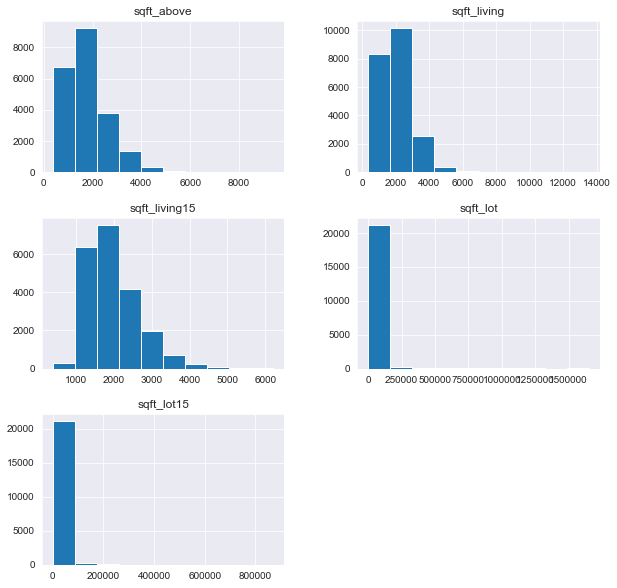

In [20]:
df[norm_candidates].hist(figsize=(10,10));

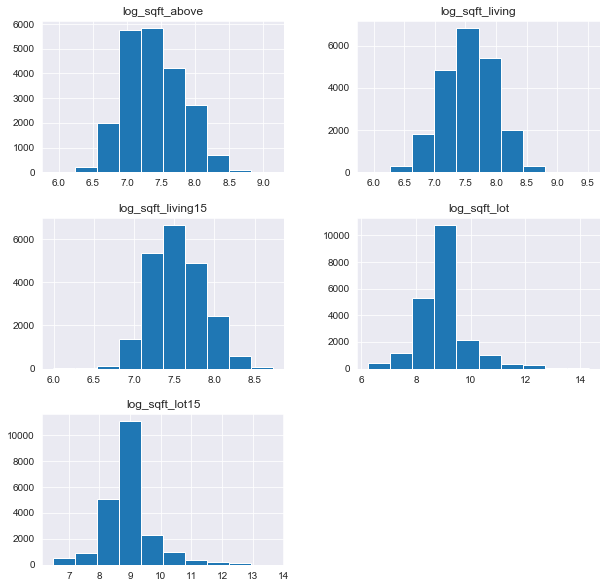

In [22]:
df_log = df

log_sqft_living = np.log(df['sqft_living'])
log_sqft_lot = np.log(df['sqft_lot'])
log_sqft_above = np.log(df['sqft_above'])
log_sqft_living15 = np.log(df['sqft_living15'])
log_sqft_lot15 = np.log(df['sqft_lot15'])

logs = ['log_sqft_above', 'log_sqft_living', 'log_sqft_living15' , 'log_sqft_lot', 'log_sqft_lot15']

df_log['log_sqft_above'] = log_sqft_above
df_log['log_sqft_living'] = log_sqft_living
df_log['log_sqft_living15'] = log_sqft_living15
df_log['log_sqft_lot'] = log_sqft_lot
df_log['log_sqft_lot15'] = log_sqft_lot15

df_log[logs].hist(figsize=(10,10));

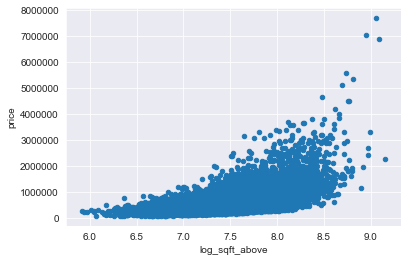

In [26]:
df_log.plot(kind = 'scatter', x = 'log_sqft_above', y = 'price')

In [27]:
df_log.corr()

,id,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long,day_of_year,month,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15
id,1.000000,-0.017392,0.000991,0.004971,0.018573,-0.008429,0.011592,-0.023944,0.008331,-0.004432,0.021609,-0.008027,-0.002001,0.020637,-0.012328,-0.012432,-0.001617,-0.001901,-0.003106,-0.149841,-0.147627
price,-0.017392,1.000000,0.308063,0.525053,0.257052,0.241756,0.395734,0.035393,0.668307,0.320197,0.054273,-0.053620,0.307868,0.022417,-0.011269,-0.009691,0.543377,0.612280,0.544221,0.161751,0.147952
bedrooms,0.000991,0.308063,1.000000,0.514368,0.177391,-0.005137,0.078523,0.026402,0.356095,0.298345,0.155462,-0.153990,-0.010415,0.132318,-0.001617,-0.000876,0.515985,0.621671,0.406227,0.184993,0.162340
bathrooms,0.004971,0.525053,0.514368,1.000000,0.502285,0.059019,0.186451,-0.126682,0.665312,0.278673,0.507565,-0.204435,0.024487,0.225025,0.006596,0.007133,0.695548,0.761960,0.571223,0.100529,0.091949
floors,0.018573,0.257052,0.177391,0.502285,1.000000,0.019004,0.028436,-0.264138,0.458694,-0.242840,0.489410,-0.058966,0.049419,0.125329,0.013170,0.013782,0.546960,0.367001,0.274554,-0.238211,-0.228029
waterfront,-0.008429,0.241756,-0.005137,0.059019,0.019004,1.000000,0.352928,0.015980,0.078044,0.076499,-0.021523,0.026254,-0.011464,-0.034810,0.006629,0.005532,0.054720,0.072865,0.073219,0.063007,0.072382
view,0.011592,0.395734,0.078523,0.186451,0.028436,0.352928,1.000000,0.045735,0.249727,0.273382,-0.054564,0.085277,0.006141,-0.077894,-0.004329,-0.005327,0.157283,0.245362,0.263133,0.121992,0.119399
condition,-0.023944,0.035393,0.026402,-0.126682,-0.264138,0.015980,0.045735,1.000000,-0.147326,0.168548,-0.361398,0.002125,-0.015594,-0.105475,0.021922,0.022347,-0.150583,-0.049835,-0.089239,0.074406,0.080398
grade,0.008331,0.668307,0.356095,0.665312,0.458694,0.078044,0.249727,-0.147326,1.000000,0.164857,0.448255,-0.185710,0.113787,0.200821,0.007463,0.008787,0.742805,0.742740,0.688704,0.184337,0.185017
sqft_basement,-0.004432,0.320197,0.298345,0.278673,-0.242840,0.076499,0.273382,0.168548,0.164857,1.000000,-0.131535,0.074701,0.109391,-0.143052,0.006226,0.007286,-0.051755,0.417830,0.204185,0.092317,0.079228


In [23]:
df_log = df_log.drop(['sqft_living', 'sqft_lot', 'sqft_above','sqft_living15','sqft_lot15'], axis=1)
df_log.head(2)

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long,day_of_year,month,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1.0,1.0,0.0,3,7,0.0,1955,98178,47.5112,-122.257,286,10,7.073270,7.073270,7.200425,8.639411,8.639411
1,6414100192,2014-12-09,538000.0,3,2.25,2.0,0.0,0.0,3,7,400.0,1951,98125,47.7210,-122.319,343,12,7.682482,7.851661,7.432484,8.887653,8.941022


In [25]:
x_cols = df_log.drop(['price','date','id','zipcode'], axis=1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors
model = smf.ols(formula=f, data=df_log).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Ordinary least squares
===========================================================================================
Model:                       OLS                     Adj. R-squared:            0.673      
Dependent Variable:          price                   AIC:                       588788.3769
Date:                        2020-07-15 10:48        BIC:                       588939.9473
No. Observations:            21534                   Log-Likelihood:            -2.9438e+05
Df Model:                    18                      F-statistic:               2462.      
Df Residuals:                21515                   Prob (F-statistic):        0.00       
R-squared:                   0.673                   Scale:                     4.3827e+10 
-------------------------------------------------------------------------------------------
                      Coef.        Std.Err.      t     P>|t|      [0.025         0.975]    
-------------------------------------------------------------------------------------------
Intercept         -30369012.3920 1718595.2147 -17.6708 0.0000 -33737586.6219 -27000438.1621
bedrooms             -17494.2172    2050.3097  -8.5325 0.0000    -21512.9764    -13475.4580
bathrooms             79760.0788    3357.1152  23.7585 0.0000     73179.8837     86340.2739
floors                -5575.7736    4099.6076  -1.3601 0.1738    -13611.3089      2459.7617
waterfront           525648.1129   17329.9049  30.3319 0.0000    491680.2125    559616.0132
view                  52652.6305    2182.9905  24.1195 0.0000     48373.8070     56931.4540
condition             28013.0265    2404.1897  11.6518 0.0000     23300.6362     32725.4168
grade                131955.0805    2173.9292  60.6989 0.0000    127694.0179    136216.1431
sqft_basement           295.4637       8.8598  33.3487 0.0000       278.0978       312.8296
yr_built              -2960.5974      71.1125 -41.6326 0.0000     -3099.9831     -2821.2116
lat                  550049.4531   10991.5386  50.0430 0.0000    528505.2214    571593.6848
long                 -64944.2920   12756.5810  -5.0910 0.0000    -89948.1379    -39940.4461
day_of_year            -400.2301     165.2929  -2.4213 0.0155      -724.2164       -76.2437
month                  9255.2648    5027.1735   1.8410 0.0656      -598.3686     19108.8981
log_sqft_above       578892.2980   16800.7252  34.4564 0.0000    545961.6291    611822.9669
log_sqft_living     -459610.6289   18223.9967 -25.2201 0.0000   -495331.0155   -423890.2422
log_sqft_living15     81763.9243    7342.9576  11.1350 0.0000     67371.1823     96156.6664
log_sqft_lot           7757.6406    4174.9285   1.8581 0.0632      -425.5293     15940.8105
log_sqft_lot15       -16401.7198    4527.6966  -3.6225 0.0003    -25276.3413     -7527.0983
-------------------------------------------------------------------------------------------
Omnibus:                    19719.231             Durbin-Watson:                1.986      
Prob(Omnibus):              0.000                 Jarque-Bera (JB):             2503218.735
Skew:                       3.966                 Prob(JB):                     0.000      
Kurtosis:                   55.220                Condition No.:                2417224    
===========================================================================================
* The condition number is large (2e+06). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = df_log
y = data['price']
X = data.drop(['price','date','id','zipcode'], axis = 1)

In [38]:
# create data sets with an 80/20 split - train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [62]:
len(y_test)

4307

In [39]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 43902562751.48366
Test Mean Squarred Error: 43431759718.48621


In [40]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print('Train Root Mean Squarred Error:', rmse_train)
print('Test Root Mean Squarred Error:', rmse_test)

Train Root Mean Squarred Error: 209529.3839810628
Test Root Mean Squarred Error: 208402.8783834


In [42]:
df_final = df_log

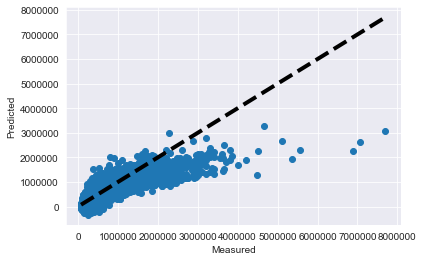

In [47]:
from sklearn.model_selection import cross_val_predict

predicted = cross_val_predict(linreg, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

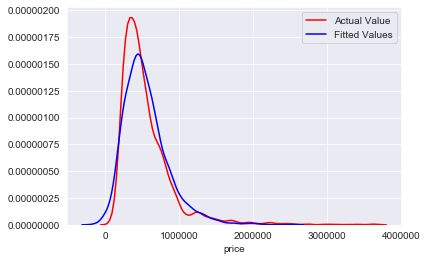

In [60]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat_test, hist=False, color="b", label="Fitted Values" , ax=ax1)